In [6]:
import lightkurve as lk
from lightkurve import search_targetpixelfile

In [43]:
!pip install eleanor

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\wheel.exe' -> 'C:\\Python310\\Scripts\\wheel.exe.deleteme'

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached eleanor-2.0.4.tar.gz (6.7 MB)
  Using cached photutils-1.4.0-cp310-cp310-win_amd64.whl (564 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached lightkurve-2.2.1-py3-none-any.whl (254 kB)
  Using cached astroquery-0.4.6-py3-none-any.whl (4.5 MB)
  Using cached torch-1.11.0-cp310-cp310-win_amd64.whl (158.0 MB)
  Using cached eleanor-2.0.3.tar.gz (6.7 MB)
  Using cached eleanor-2.0.2.tar.gz (6.7 MB)
  Using cached eleanor-2.0.1.tar.gz (6.7 MB)
  Using cached eleanor-2.0.0.tar.gz (6.7 MB)
  Using cached eleanor-1.0.5.tar.gz (6.1 MB)
  Using cached eleanor-1.0.4.tar.gz (45 kB)
  Using cached eleanor-1.0.3.tar.gz (44 kB)
  Using cached eleanor-1.0.2.tar.gz (44 kB)
  Using cached eleanor-1.0.1.tar.gz (44 kB)
  Using cached mplcursors-0.5.1.tar.gz (88 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl (18.5 MB)
  Using cached fitsio-1.1.7.tar.gz (5.0 MB)
  Using cached eleanor-1.0.0.tar.gz (37 kB)
  Using cached eleanor-0.2.10.tar.gz (37 kB)
  Using cached m

  Using cached google_auth-2.8.0-py2.py3-none-any.whl (164 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached Werkzeug-2.1.2-py3-none-any.whl (224 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.7-py3-none-any.whl (97 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)
Using legacy 'setup.py install' for eleanor, since package 'wheel' is not installed.
Using legacy 'setup.py install' for fitsio, since package 'wheel' is not installed.
Using legacy 'setup.py install' for fbpca, since package 'wheel' is not installed.
Using legacy 'setup.py install' for memoization, since package 'wheel' is not installed.
Using legacy 'setup.py in

In [19]:
result = lk.search_tesscut('TIC 123233041')
tpf = result.download(cutout_size=5)

c:\Users\60002\AppData\Local\Programs\Python\Python37\lib\site-packages\lightkurve\search.py:352: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


In [26]:
aperture_mask = tpf.create_threshold_mask(threshold=5)

<AxesSubplot:title={'center':'Target ID: TIC 123233041, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

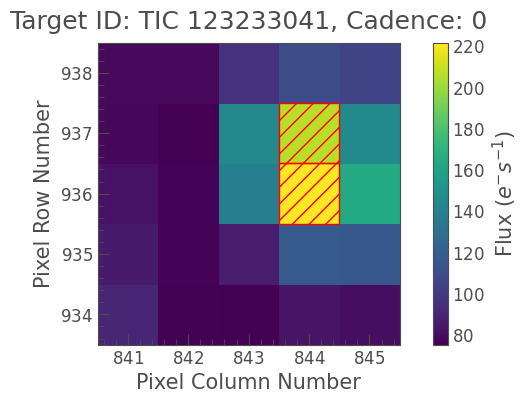

In [27]:
tpf.plot(aperture_mask=aperture_mask)

In [12]:
result = lk.search_tesscut('TIC 6663331')
tpf = result.download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 6663331, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

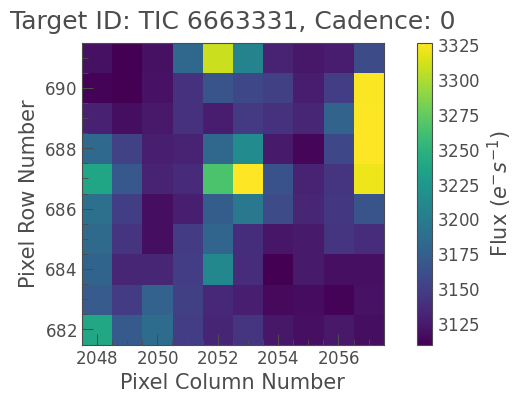

In [13]:
tpf.plot()

In [129]:
def generate_cutout(tic_id:str='',large_size:int=30,small_size:int=5):
    import matplotlib.pyplot as plt
    import lightkurve as lk
    from matplotlib.patches import Rectangle
    import os

    os.mkdir('temp')

    result = lk.search_tesscut(tic_id)
    small_tpf = result.download(cutout_size=small_size)
    large_tpf = result.download(cutout_size=large_size)
    fig = plt.figure()
    fig, ax = plt.subplots()
    small_tpf.plot(ax=ax)
    rect_x = ax.get_xlim()[1]-ax.get_xlim()[0]
    rect_y = ax.get_ylim()[1]-ax.get_ylim()[0]
    plt.savefig('temp/small.pdf')
    fig1, ax1 = plt.subplots()
    large_tpf.plot(ax=ax1)
    ax1.add_patch(Rectangle((ax.get_xlim()[0],ax.get_ylim()[0]),rect_x,rect_y,fc='none',linewidth=1,ec='red'))
    plt.savefig('temp/final.pdf')

    os.remove('temp')
    

<Figure size 432x288 with 0 Axes>

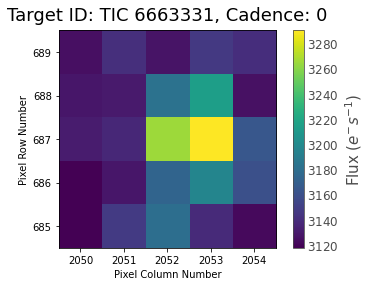

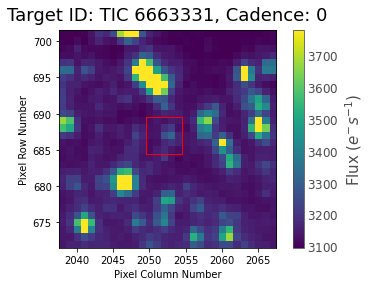

In [130]:
generate_cutout('TIC 6663331')

<AxesSubplot:title={'center':'Target ID: TIC 6663331, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

<Figure size 432x288 with 0 Axes>

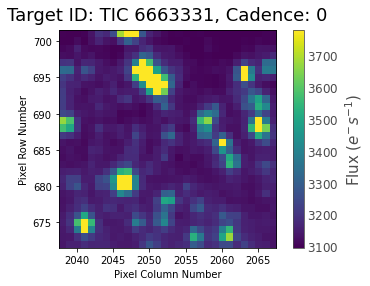

In [74]:
import matplotlib.pyplot as plt
result = lk.search_tesscut('TIC 6663331')
tpf = result.download(cutout_size=30)
fig = plt.figure()
fig, ax = plt.subplots()
tpf.plot(ax=ax)


In [81]:
ax.get_xlim()[0]

2037.5

In [11]:
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", quarter=4, cadence="long").download()

In [12]:
tpf.pipeline_mask

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True, False],
       [False,  True,  True,  True, False],
       [False, False, False,  True, False]])

<AxesSubplot:title={'center':'Target ID: 6922244, Cadence: 11914'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

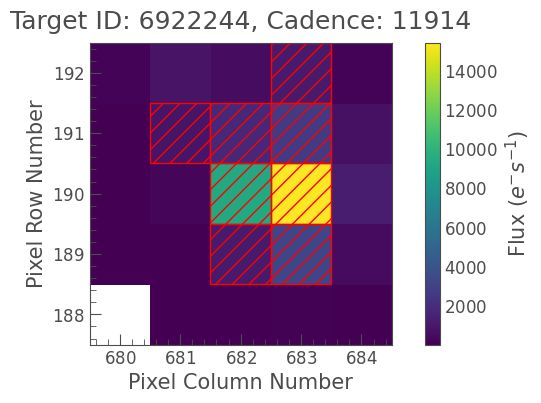

In [13]:
tpf.plot(aperture_mask=tpf.pipeline_mask)